# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

total_sets = len(cities)//50 
last_set = len(cities)% 50

if last_set > 0:
    total_sets=total_sets + 1

# Build query URL
query_url = url + "appid=" + api_key + "&q="

# Get weather data

city_name =[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp =[]
wind_speed =[]

set_start = 0
set_end =50



for sets in range(total_sets):
    record = 0
    for x in range(set_start,set_end):
        city = cities[x]
        record = record +1
        response = requests.get(query_url + city + "&units=imperial").json()
        try:
            city_name.append(response['name'])
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])
            print(f"Processing Record {record} of Set {sets +1} | {city} ")
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")    
    set_start = set_end
    
    if sets == total_sets-2 and last_set > 0:
        set_end = set_start + last_set
    else:
        set_end = set_start + 50

Processing Record 1 of Set 1 | bethel 
Processing Record 2 of Set 1 | changping 
Processing Record 3 of Set 1 | tanout 
Missing field/result... skipping.
Processing Record 5 of Set 1 | mataura 
Processing Record 6 of Set 1 | provideniya 
Processing Record 7 of Set 1 | fukuma 
Processing Record 8 of Set 1 | busselton 
Processing Record 9 of Set 1 | ushuaia 
Processing Record 10 of Set 1 | kupang 
Processing Record 11 of Set 1 | vaini 
Processing Record 12 of Set 1 | butaritari 
Processing Record 13 of Set 1 | cape town 
Processing Record 14 of Set 1 | codrington 
Processing Record 15 of Set 1 | bredasdorp 
Missing field/result... skipping.
Processing Record 17 of Set 1 | klaksvik 
Processing Record 18 of Set 1 | constitucion 
Processing Record 19 of Set 1 | muyezerskiy 
Missing field/result... skipping.
Missing field/result... skipping.
Processing Record 22 of Set 1 | kruisfontein 
Processing Record 23 of Set 1 | brigantine 
Processing Record 24 of Set 1 | yellowknife 
Processing Record

Processing Record 2 of Set 5 | dikson 
Processing Record 3 of Set 5 | erenhot 
Processing Record 4 of Set 5 | murgab 
Processing Record 5 of Set 5 | sarmanovo 
Processing Record 6 of Set 5 | halifax 
Missing field/result... skipping.
Processing Record 8 of Set 5 | kilindoni 
Missing field/result... skipping.
Processing Record 10 of Set 5 | awbari 
Processing Record 11 of Set 5 | vanimo 
Missing field/result... skipping.
Processing Record 13 of Set 5 | ibra 
Missing field/result... skipping.
Processing Record 15 of Set 5 | umri 
Processing Record 16 of Set 5 | east london 
Processing Record 17 of Set 5 | tasiilaq 
Processing Record 18 of Set 5 | chokurdakh 
Missing field/result... skipping.
Missing field/result... skipping.
Processing Record 21 of Set 5 | karratha 
Processing Record 22 of Set 5 | thompson 
Processing Record 23 of Set 5 | talnakh 
Processing Record 24 of Set 5 | victoria 
Processing Record 25 of Set 5 | lev tolstoy 
Processing Record 26 of Set 5 | itoman 
Processing Reco

Processing Record 3 of Set 9 | egvekinot 
Processing Record 4 of Set 9 | ascheberg 
Processing Record 5 of Set 9 | qasigiannguit 
Processing Record 6 of Set 9 | davila 
Processing Record 7 of Set 9 | aloleng 
Processing Record 8 of Set 9 | ancud 
Processing Record 9 of Set 9 | yerofey pavlovich 
Processing Record 10 of Set 9 | dong hoi 
Missing field/result... skipping.
Processing Record 12 of Set 9 | baisha 
Processing Record 13 of Set 9 | gat 
Processing Record 14 of Set 9 | shwebo 
Processing Record 15 of Set 9 | kimbe 
Processing Record 16 of Set 9 | neuquen 
Processing Record 17 of Set 9 | anahuac 
Processing Record 18 of Set 9 | ordynskoye 
Processing Record 19 of Set 9 | stratonion 
Processing Record 20 of Set 9 | san ramon 
Processing Record 21 of Set 9 | sisophon 
Processing Record 22 of Set 9 | minab 
Processing Record 23 of Set 9 | beloha 
Missing field/result... skipping.
Processing Record 25 of Set 9 | vila velha 
Processing Record 26 of Set 9 | puerto escondido 
Processin

Processing Record 2 of Set 13 | naryan-mar 
Processing Record 3 of Set 13 | cockburn town 
Missing field/result... skipping.
Processing Record 5 of Set 13 | north myrtle beach 
Processing Record 6 of Set 13 | sharlyk 
Processing Record 7 of Set 13 | okato 
Processing Record 8 of Set 13 | coahuayana 
Processing Record 9 of Set 13 | boende 
Processing Record 10 of Set 13 | vuktyl 
Missing field/result... skipping.
Processing Record 12 of Set 13 | waingapu 
Processing Record 13 of Set 13 | trusesti 
Processing Record 14 of Set 13 | kang 
Processing Record 15 of Set 13 | glendive 
Processing Record 16 of Set 13 | tucurui 
Processing Record 17 of Set 13 | teruel 
Processing Record 18 of Set 13 | kastamonu 
Processing Record 19 of Set 13 | dumingag 
Missing field/result... skipping.
Processing Record 21 of Set 13 | burriana 
Missing field/result... skipping.
Missing field/result... skipping.
Processing Record 24 of Set 13 | igreja nova 
Processing Record 25 of Set 13 | suna 
Processing Recor

In [5]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": city_name,
    "cloudiness": cloudiness,
    "country": country,
    "date": date,
    "humidity": humidity,
    "lat": lat,
    "lng": lng,
    "max_temp": max_temp,
    "wind_speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed
0,Bethel,90,US,1555769040,92,60.79,-161.76,23.00,3.36
1,Changping,100,CN,1555770596,87,40.22,116.23,57.00,2.24
2,Tanout,0,NE,1555770600,5,14.97,8.88,102.11,11.10
3,Mataura,0,NZ,1555770005,96,-46.19,168.86,46.99,0.83
4,Provideniya,20,RU,1555770600,76,64.42,-173.23,1.13,6.33


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data.to_csv('weather_data.csv')

In [ ]:
weather_data

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

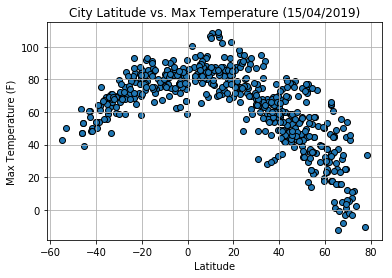

In [8]:
# List of values from 0 to 100 each value being 1 greater than the last

weather_data['lat'] = weather_data['lat'].astype(float)
weather_data['max_temp'] = weather_data['max_temp'].astype(float)

x_axis = weather_data['lat'] 
y_axis = weather_data['max_temp']

plt.scatter(x_axis, y_axis, marker="o",edgecolors="black")


plt.title("City Latitude vs. Max Temperature (15/04/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../Images/Latitude_Temp.png")

#### Latitude vs. Humidity Plot

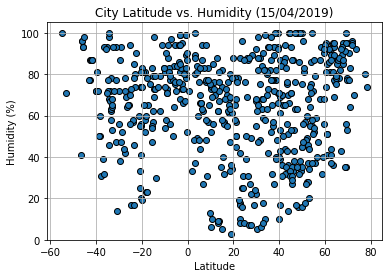

In [9]:
weather_data['lat'] = weather_data['lat'].astype(float)
weather_data['humidity'] = weather_data['humidity'].astype(float)

x_axis = weather_data['lat'] 
y_axis = weather_data['humidity']

plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

plt.title("City Latitude vs. Humidity (15/04/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(0, 105)

plt.savefig("../Images/Latitude_Humidity.png")

#### Latitude vs. Cloudiness Plot

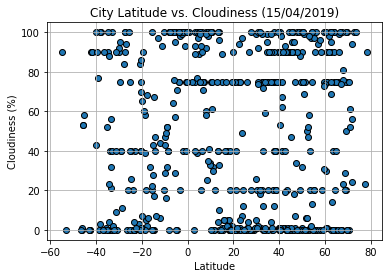

In [10]:
weather_data['lat'] = weather_data['lat'].astype(float)
weather_data['cloudiness'] = weather_data['cloudiness'].astype(float)

x_axis = weather_data['lat'] 
y_axis = weather_data['cloudiness']

plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
plt.ylim(-5, 105)

plt.title("City Latitude vs. Cloudiness (15/04/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/Latitude_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

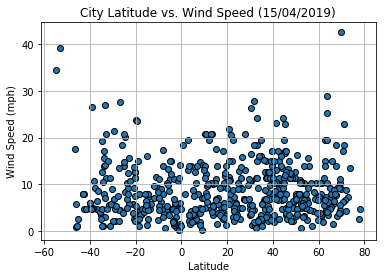

In [11]:
weather_data['lat'] = weather_data['lat'].astype(float)
weather_data['wind_speed'] = weather_data['wind_speed'].astype(float)

x_axis = weather_data['lat'] 
y_axis = weather_data['wind_speed']

plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")
             

plt.title("City Latitude vs. Wind Speed (15/04/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/Latitude_WindSpeed.png")